In [19]:
%reload_ext autoreload 
%autoreload 2
%matplotlib inline 

In [20]:
from fastai.imports import * 
from fastai.transforms import * 
from fastai.conv_learner import * 
from fastai.model import * 
from fastai.dataset import * 
from fastai.sgdr import * 
from fastai.plots import * 

In [21]:
PATH = 'data/planet/'

In [22]:
ls {PATH}

kaggleFiles/  models/  test-jpg/  tmp/  train-jpg/  train_v2.csv*


# Two different labels haze and primary per image 

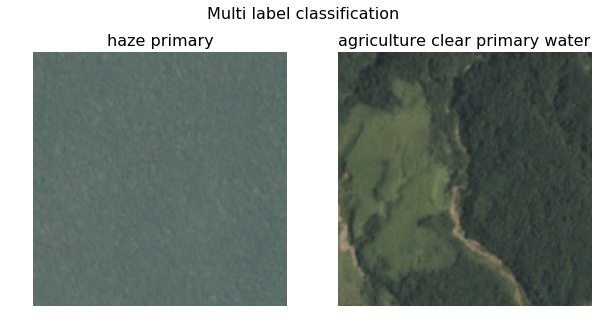

In [26]:
def get_1st (path): 
    return glob(f'{path}/*.*')[0]

list_paths = [f"{PATH}train-jpg/train_0.jpg", f"{PATH}train-jpg/train_1.jpg"]
titles = ["haze primary", "agriculture clear primary water"]
plots_from_files(list_paths, titles=titles, maintitle="Multi label classification")

# Multi label models for Earth dataset

In [32]:
from planet import f2
metrics=[f2]
f_model=resnet34 
label_csv=f'{PATH}train_v2.csv'
n=len(list(open(label_csv)))-1
val_idxs=get_cv_idxs(n)

## Data augmentation and vertical flips 

In [42]:
def get_data(s2): 
    tfms = tfms_from_model(f_model, s2, aug_tfms = transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms, suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

In [43]:
sz=64
data=get_data(sz)

A Jupyter Widget


                                         

  0%|          | 0/32384 [00:00<?, ?it/s]

  1%|          | 175/32384 [00:00<00:19, 1690.05it/s]

  1%|          | 291/32384 [00:00<00:22, 1428.22it/s]

  1%|▏         | 409/32384 [00:00<00:23, 1338.22it/s]

  2%|▏         | 529/32384 [00:00<00:24, 1303.01it/s]

  2%|▏         | 645/32384 [00:00<00:24, 1274.94it/s]

  2%|▏         | 763/32384 [00:00<00:25, 1256.61it/s]

  3%|▎         | 881/32384 [00:00<00:25, 1245.39it/s]

  3%|▎         | 992/32384 [00:00<00:25, 1224.46it/s]

  3%|▎         | 1113/32384 [00:00<00:25, 1223.15it/s]

  4%|▍         | 1231/32384 [00:01<00:25, 1216.78it/s]

  4%|▍         | 1349/32384 [00:01<00:25, 1212.82it/s]

  5%|▍         | 1464/32384 [00:01<00:25, 1206.37it/s]

  5%|▍         | 1579/32384 [00:01<00:25, 1201.94it/s]

  5%|▌         | 1697/32384 [00:01<00:25, 1199.66it/s]

  6%|▌         | 1813/32384 [00:01<00:25, 1195.40it/s]

  6%|▌         | 1930/32384 [00:01<00:25, 1192.44it/s]

  6%|▋         | 2045/323

 48%|████▊     | 15409/32384 [00:13<00:14, 1160.45it/s]

 48%|████▊     | 15529/32384 [00:13<00:14, 1160.65it/s]

 48%|████▊     | 15646/32384 [00:13<00:14, 1160.68it/s]

 49%|████▊     | 15763/32384 [00:13<00:14, 1160.58it/s]

 49%|████▉     | 15879/32384 [00:13<00:14, 1160.61it/s]

 49%|████▉     | 15995/32384 [00:13<00:14, 1160.27it/s]

 50%|████▉     | 16111/32384 [00:13<00:14, 1160.23it/s]

 50%|█████     | 16228/32384 [00:13<00:13, 1160.16it/s]

 50%|█████     | 16345/32384 [00:14<00:13, 1160.26it/s]

 51%|█████     | 16464/32384 [00:14<00:13, 1160.04it/s]

 51%|█████     | 16585/32384 [00:14<00:13, 1160.33it/s]

 52%|█████▏    | 16702/32384 [00:14<00:13, 1160.27it/s]

 52%|█████▏    | 16819/32384 [00:14<00:13, 1160.27it/s]

 52%|█████▏    | 16935/32384 [00:14<00:13, 1160.01it/s]

 53%|█████▎    | 17057/32384 [00:14<00:13, 1160.29it/s]

 53%|█████▎    | 17174/32384 [00:14<00:13, 1160.15it/s]

 53%|█████▎    | 17290/32384 [00:14<00:13, 1160.03it/s]

 54%|█████▍    | 17410/32384 [0

 95%|█████████▍| 30717/32384 [00:26<00:01, 1159.64it/s]

 95%|█████████▌| 30835/32384 [00:26<00:01, 1159.63it/s]

 96%|█████████▌| 30952/32384 [00:26<00:01, 1159.68it/s]

 96%|█████████▌| 31070/32384 [00:26<00:01, 1159.78it/s]

 96%|█████████▋| 31187/32384 [00:26<00:01, 1159.72it/s]

 97%|█████████▋| 31304/32384 [00:26<00:00, 1159.72it/s]

 97%|█████████▋| 31420/32384 [00:27<00:00, 1159.76it/s]

 97%|█████████▋| 31537/32384 [00:27<00:00, 1159.65it/s]

 98%|█████████▊| 31653/32384 [00:27<00:00, 1159.60it/s]

 98%|█████████▊| 31769/32384 [00:27<00:00, 1159.38it/s]

 98%|█████████▊| 31886/32384 [00:27<00:00, 1159.43it/s]

 99%|█████████▉| 32004/32384 [00:27<00:00, 1159.46it/s]

 99%|█████████▉| 32121/32384 [00:27<00:00, 1159.45it/s]

100%|█████████▉| 32238/32384 [00:27<00:00, 1159.46it/s]

100%|█████████▉| 32356/32384 [00:27<00:00, 1159.51it/s]

                                                       

  0%|          | 0/8095 [00:00<?, ?it/s]

  2%|▏         | 143/8095 [00:00<00:05, 1369.1

 14%|█▎        | 5548/40669 [00:04<00:30, 1154.90it/s]

 14%|█▍        | 5665/40669 [00:04<00:30, 1155.51it/s]

 14%|█▍        | 5784/40669 [00:05<00:30, 1155.65it/s]

 15%|█▍        | 5903/40669 [00:05<00:30, 1155.77it/s]

 15%|█▍        | 6021/40669 [00:05<00:29, 1156.45it/s]

 15%|█▌        | 6138/40669 [00:05<00:29, 1156.03it/s]

 15%|█▌        | 6256/40669 [00:05<00:29, 1156.21it/s]

 16%|█▌        | 6373/40669 [00:05<00:29, 1156.30it/s]

 16%|█▌        | 6494/40669 [00:05<00:29, 1157.13it/s]

 16%|█▋        | 6612/40669 [00:05<00:29, 1156.83it/s]

 17%|█▋        | 6729/40669 [00:05<00:29, 1156.44it/s]

 17%|█▋        | 6845/40669 [00:05<00:29, 1156.18it/s]

 17%|█▋        | 6962/40669 [00:06<00:29, 1156.59it/s]

 17%|█▋        | 7078/40669 [00:06<00:29, 1156.55it/s]

 18%|█▊        | 7198/40669 [00:06<00:28, 1156.90it/s]

 18%|█▊        | 7315/40669 [00:06<00:28, 1157.17it/s]

 18%|█▊        | 7432/40669 [00:06<00:28, 1156.72it/s]

 19%|█▊        | 7552/40669 [00:06<00:28, 1156.9

 51%|█████▏    | 20870/40669 [00:18<00:17, 1150.41it/s]

 52%|█████▏    | 20986/40669 [00:18<00:17, 1150.48it/s]

 52%|█████▏    | 21103/40669 [00:18<00:17, 1150.47it/s]

 52%|█████▏    | 21219/40669 [00:18<00:16, 1150.47it/s]

 52%|█████▏    | 21333/40669 [00:18<00:16, 1150.38it/s]

 53%|█████▎    | 21452/40669 [00:18<00:16, 1150.53it/s]

 53%|█████▎    | 21571/40669 [00:18<00:16, 1150.70it/s]

 53%|█████▎    | 21688/40669 [00:18<00:16, 1150.69it/s]

 54%|█████▎    | 21804/40669 [00:18<00:16, 1150.50it/s]

 54%|█████▍    | 21922/40669 [00:19<00:16, 1150.74it/s]

 54%|█████▍    | 22043/40669 [00:19<00:16, 1151.02it/s]

 54%|█████▍    | 22161/40669 [00:19<00:16, 1150.91it/s]

 55%|█████▍    | 22280/40669 [00:19<00:15, 1150.98it/s]

 55%|█████▌    | 22398/40669 [00:19<00:15, 1151.15it/s]

 55%|█████▌    | 22516/40669 [00:19<00:15, 1151.24it/s]

 56%|█████▌    | 22633/40669 [00:19<00:15, 1151.00it/s]

 56%|█████▌    | 22758/40669 [00:19<00:15, 1151.50it/s]

 56%|█████▋    | 22877/40669 [0

 89%|████████▉ | 36190/40669 [00:31<00:03, 1152.01it/s]

 89%|████████▉ | 36311/40669 [00:31<00:03, 1152.15it/s]

 90%|████████▉ | 36431/40669 [00:31<00:03, 1152.24it/s]

 90%|████████▉ | 36548/40669 [00:31<00:03, 1152.31it/s]

 90%|█████████ | 36665/40669 [00:31<00:03, 1152.22it/s]

 90%|█████████ | 36783/40669 [00:31<00:03, 1152.23it/s]

 91%|█████████ | 36903/40669 [00:32<00:03, 1152.36it/s]

 91%|█████████ | 37020/40669 [00:32<00:03, 1152.37it/s]

 91%|█████████▏| 37137/40669 [00:32<00:03, 1152.38it/s]

 92%|█████████▏| 37255/40669 [00:32<00:02, 1152.39it/s]

 92%|█████████▏| 37371/40669 [00:32<00:02, 1152.40it/s]

 92%|█████████▏| 37487/40669 [00:32<00:02, 1152.29it/s]

 92%|█████████▏| 37603/40669 [00:32<00:02, 1152.41it/s]

 93%|█████████▎| 37721/40669 [00:32<00:02, 1152.37it/s]

 93%|█████████▎| 37839/40669 [00:32<00:02, 1152.49it/s]

 93%|█████████▎| 37956/40669 [00:32<00:02, 1152.50it/s]

 94%|█████████▎| 38073/40669 [00:33<00:02, 1152.51it/s]

 94%|█████████▍| 38190/40669 [0

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/ubuntu/.torch/models/resnet34-333f7ec4.pth


  0%|          | 0/87306240 [00:00<?, ?it/s]

  0%|          | 253952/87306240 [00:00<00:34, 2524882.28it/s]

  1%|          | 851968/87306240 [00:00<00:29, 2951508.13it/s]

  2%|▏         | 1376256/87306240 [00:00<00:25, 3372346.59it/s]

  2%|▏         | 1900544/87306240 [00:00<00:24, 3523637.69it/s]

  3%|▎         | 2424832/87306240 [00:00<00:21, 3893102.54it/s]

  4%|▍         | 3907584/87306240 [00:00<00:16, 4967745.25it/s]

  7%|▋         | 6340608/87306240 [00:00<00:12, 6525651.38it/s]

 10%|▉         | 8404992/87306240 [00:00<00:09, 8209701.36it/s]

 11%|█▏        | 9871360/87306240 [00:01<00:09, 8123108.46it/s]

 13%|█▎        | 11141120/87306240 [00:01<00:08, 8722381.08it/s]

 14%|█▍        | 12345344/87306240 [00:01<00:16, 4593528.32it/s]

 15%|█▌        | 13516800/87306240 [00:01<00:13, 5617732.72it/s]

 19%|█▉        | 16998400/87306240 [00:01<00:0

A Jupyter Widget



  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 0/506 [03:29<?, ?it/s, loss=0.837]

  0%|          | 1/506 [03:29<29:24:04, 209.59s/it, loss=0.837]

  0%|          | 1/506 [03:29<29:24:12, 209.61s/it, loss=0.843]

  0%|          | 1/506 [03:29<29:24:21, 209.63s/it, loss=0.847]

  0%|          | 1/506 [03:29<29:24:30, 209.65s/it, loss=0.849]

  0%|          | 1/506 [03:29<29:24:40, 209.66s/it, loss=0.848]

  0%|          | 1/506 [03:29<29:24:48, 209.68s/it, loss=0.854]

  0%|          | 1/506 [03:29<29:24:57, 209.70s/it, loss=0.857]

  1%|▏         | 7/506 [03:29<4:09:08, 29.96s/it, loss=0.857]  

  1%|▏         | 7/506 [03:29<4:09:09, 29.96s/it, loss=0.859]

  1%|▏         | 7/506 [03:29<4:09:11, 29.96s/it, loss=0.859]

  1%|▏         | 7/506 [03:29<4:09:12, 29.96s/it, loss=0.863]

  1%|▏         | 7/506 [03:29<4:09:13, 29.97s/it, loss=0.862]

  1%|▏         | 7/506 [03:29<4:09:14, 29.97s/it, loss=0.865]

  1%|▏         | 7/506 [03:29<4:09:16, 29.97s/it, loss=0.865]

  3%|▎

 19%|█▉        | 98/506 [03:31<14:39,  2.16s/it, loss=0.858]

 19%|█▉        | 98/506 [03:31<14:39,  2.16s/it, loss=0.858]

 19%|█▉        | 98/506 [03:31<14:39,  2.16s/it, loss=0.858]

 21%|██        | 104/506 [03:31<13:37,  2.03s/it, loss=0.858]

 21%|██        | 104/506 [03:31<13:37,  2.03s/it, loss=0.857]

 21%|██        | 104/506 [03:31<13:37,  2.03s/it, loss=0.857]

 21%|██        | 104/506 [03:31<13:37,  2.03s/it, loss=0.857]

 21%|██        | 104/506 [03:31<13:37,  2.03s/it, loss=0.856]

 21%|██        | 104/506 [03:31<13:37,  2.03s/it, loss=0.855]

 21%|██        | 104/506 [03:31<13:37,  2.03s/it, loss=0.855]

 22%|██▏       | 110/506 [03:31<12:41,  1.92s/it, loss=0.855]

 22%|██▏       | 110/506 [03:31<12:41,  1.92s/it, loss=0.855]

 22%|██▏       | 110/506 [03:31<12:41,  1.92s/it, loss=0.855]

 22%|██▏       | 110/506 [03:31<12:41,  1.92s/it, loss=0.855]

 22%|██▏       | 110/506 [03:31<12:41,  1.92s/it, loss=0.855]

 22%|██▏       | 110/506 [03:31<12:41,  1.92s/it, loss=0.8

 40%|███▉      | 202/506 [03:33<05:20,  1.05s/it, loss=0.83] 

 40%|███▉      | 202/506 [03:33<05:20,  1.05s/it, loss=0.829]

 40%|███▉      | 202/506 [03:33<05:20,  1.05s/it, loss=0.828]

 40%|███▉      | 202/506 [03:33<05:20,  1.05s/it, loss=0.828]

 40%|███▉      | 202/506 [03:33<05:20,  1.05s/it, loss=0.827]

 40%|███▉      | 202/506 [03:33<05:20,  1.06s/it, loss=0.826]

 41%|████      | 208/506 [03:33<05:05,  1.02s/it, loss=0.826]

 41%|████      | 208/506 [03:33<05:05,  1.02s/it, loss=0.825]

 41%|████      | 208/506 [03:33<05:05,  1.02s/it, loss=0.825]

 41%|████      | 208/506 [03:33<05:05,  1.02s/it, loss=0.824]

 41%|████      | 208/506 [03:33<05:05,  1.02s/it, loss=0.823]

 41%|████      | 208/506 [03:33<05:05,  1.03s/it, loss=0.822]

 41%|████      | 208/506 [03:33<05:05,  1.03s/it, loss=0.821]

 42%|████▏     | 214/506 [03:33<04:50,  1.00it/s, loss=0.821]

 42%|████▏     | 214/506 [03:33<04:50,  1.00it/s, loss=0.82] 

 42%|████▏     | 214/506 [03:33<04:50,  1.00it/s, loss=

 60%|██████    | 304/506 [03:34<02:22,  1.42it/s, loss=0.609]

 60%|██████    | 304/506 [03:34<02:22,  1.42it/s, loss=0.604]

 60%|██████    | 304/506 [03:34<02:22,  1.42it/s, loss=0.599]

 60%|██████    | 304/506 [03:34<02:22,  1.42it/s, loss=0.594]

 60%|██████    | 304/506 [03:34<02:22,  1.42it/s, loss=0.589]

 60%|██████    | 304/506 [03:34<02:22,  1.41it/s, loss=0.584]

 61%|██████▏   | 310/506 [03:34<02:15,  1.44it/s, loss=0.584]

 61%|██████▏   | 310/506 [03:34<02:15,  1.44it/s, loss=0.579]

 61%|██████▏   | 310/506 [03:34<02:15,  1.44it/s, loss=0.574]

 61%|██████▏   | 310/506 [03:34<02:15,  1.44it/s, loss=0.568]

 61%|██████▏   | 310/506 [03:34<02:15,  1.44it/s, loss=0.563]

 61%|██████▏   | 310/506 [03:34<02:15,  1.44it/s, loss=0.558]

 61%|██████▏   | 310/506 [03:34<02:15,  1.44it/s, loss=0.552]

 62%|██████▏   | 316/506 [03:34<02:09,  1.47it/s, loss=0.552]

 62%|██████▏   | 316/506 [03:34<02:09,  1.47it/s, loss=0.547]

 62%|██████▏   | 316/506 [03:34<02:09,  1.47it/s, loss=

 79%|███████▉  | 401/506 [03:36<00:56,  1.85it/s, loss=0.239]

 80%|████████  | 407/506 [03:36<00:52,  1.88it/s, loss=0.239]

 80%|████████  | 407/506 [03:36<00:52,  1.88it/s, loss=0.237]

 80%|████████  | 407/506 [03:36<00:52,  1.88it/s, loss=0.237]

 80%|████████  | 407/506 [03:36<00:52,  1.88it/s, loss=0.236]

 80%|████████  | 407/506 [03:36<00:52,  1.88it/s, loss=0.235]

 80%|████████  | 407/506 [03:36<00:52,  1.88it/s, loss=0.234]

 80%|████████  | 407/506 [03:36<00:52,  1.88it/s, loss=0.232]

 82%|████████▏ | 413/506 [03:36<00:48,  1.91it/s, loss=0.232]

 82%|████████▏ | 413/506 [03:36<00:48,  1.91it/s, loss=0.231]

 82%|████████▏ | 413/506 [03:36<00:48,  1.91it/s, loss=0.229]

 82%|████████▏ | 413/506 [03:36<00:48,  1.91it/s, loss=0.228]

 82%|████████▏ | 413/506 [03:36<00:48,  1.91it/s, loss=0.226]

 82%|████████▏ | 413/506 [03:36<00:48,  1.91it/s, loss=0.226]

 82%|████████▏ | 413/506 [03:36<00:48,  1.91it/s, loss=0.225]

 83%|████████▎ | 419/506 [03:36<00:44,  1.93it/s, loss=

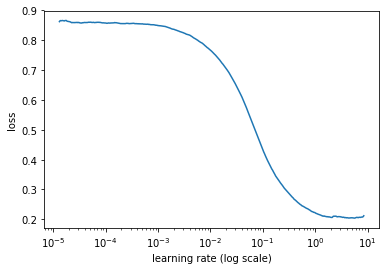

In [44]:
data=data.resize(int(sz*1.3), 'tmp')
learn=ConvLearner.pretrained(f_model, data, metrics=metrics)
lrf=learn.lr_find()
learn.sched.plot()